In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [17]:
#reading dataset
df = pd.read_csv("Mall_Customers (1).csv")
df.head() #printing first 5 elements

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#dropping id as it's not necesseary in clustering process
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
#selecting features to be scaled
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#prefered to choose the optimal k from silhoutte score however it could be identified from elbow method as well
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil)


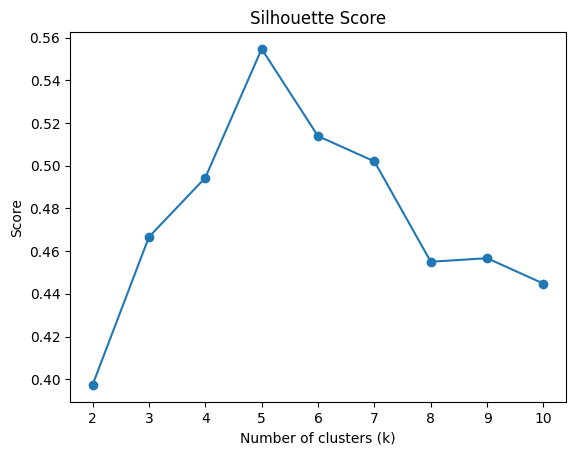

In [22]:
#silhoutte visualization
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

In [23]:
#clustering according to the optimal k
k_opt = 5
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init='auto')
df['Cluster_KMeans'] = kmeans_final.fit_predict(X_scaled)

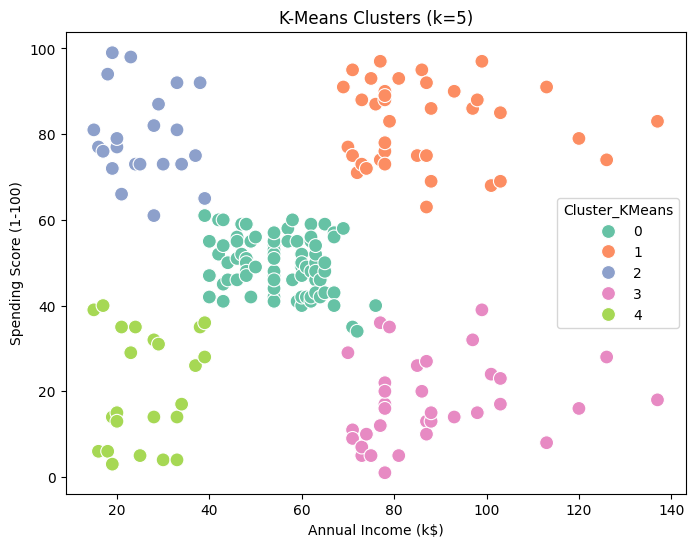

In [24]:
#visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_KMeans',
    data=df,
    palette='Set2',
    s=100
)
plt.title(f"K-Means Clusters (k={k_opt})")
plt.show()

In [14]:
print(df.groupby('Cluster_KMeans')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

                Annual Income (k$)  Spending Score (1-100)
Cluster_KMeans                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043


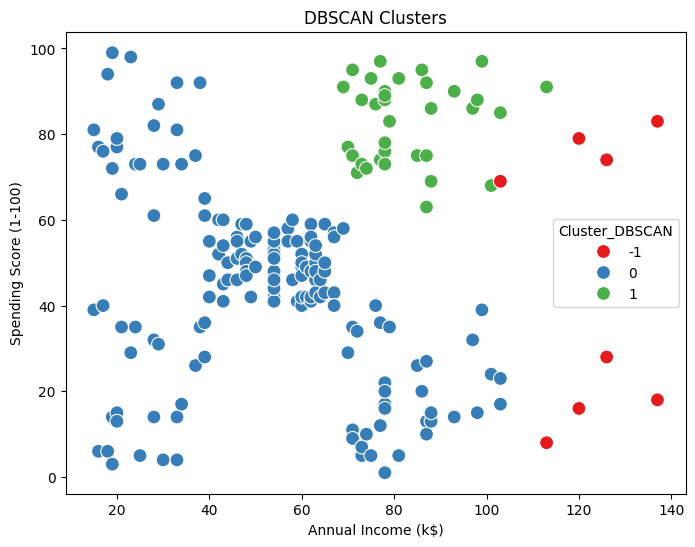

In [25]:
#clustering by db-scan
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_DBSCAN',
    data=df,
    palette='Set1',
    s=100
)
plt.title("DBSCAN Clusters")
plt.show()

